# Import Libraries

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

import os
import folium

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline

print('Libraries imported.')

Libraries imported.


# Definitions and Obtaining Data

In [2]:
def geo_location(address):
    # Get location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [3]:
def get_venues(lat,lng):
    
    # Set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = #''
    CLIENT_SECRET = #''
    VERSION = '20180605'
    
    # URL to obtain data from Foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # Obtain data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [4]:
def get_venue_details(venue_id):
        
    CLIENT_ID = #'' 
    CLIENT_SECRET = #''
    VERSION = '20180605'
    
    # URL to fetch data from Foursquare API
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()

    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [6]:
# Obtain New York data
new_york_data=get_new_york_data()

In [7]:
# Display New York data shape
new_york_data.shape

(306, 4)

# Graph Neighborhoods of New York

KeyError: 'Column not found: Neighborhoods'

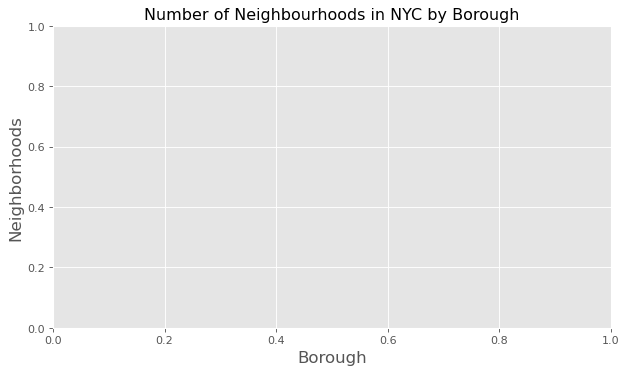

In [51]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)

# title
plt.title('Number of Neighbourhoods in NYC by Borough')

#On x-axis
plt.xlabel('Borough', fontsize = 15)

#On y-axis
plt.ylabel('Neighborhoods', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhoods'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

# Prepare Neighborhood list Containing Sushi Restaurants

In [10]:
# prepare neighborhood list that contains sushi restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
sushi_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    sushi_resturants=venues[venues['Category']=='Sushi Restaurant']   
    print('(',count,'/',len(new_york_data),')','Sushi Resturants in '+Neighborhood+', '+Borough+':'+str(len(sushi_resturants)))
    for resturant_detail in sushi_resturants.values.tolist():
        id, name , category=resturant_detail
        sushi_rest_ny = sushi_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Sushi Resturants in Wakefield, Bronx:0
( 2 / 306 ) Sushi Resturants in Co-op City, Bronx:0
( 3 / 306 ) Sushi Resturants in Eastchester, Bronx:0
( 4 / 306 ) Sushi Resturants in Fieldston, Bronx:0
( 5 / 306 ) Sushi Resturants in Riverdale, Bronx:0
( 6 / 306 ) Sushi Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Sushi Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Sushi Resturants in Woodlawn, Bronx:0
( 9 / 306 ) Sushi Resturants in Norwood, Bronx:0
( 10 / 306 ) Sushi Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Sushi Resturants in Baychester, Bronx:0
( 12 / 306 ) Sushi Resturants in Pelham Parkway, Bronx:1
( 13 / 306 ) Sushi Resturants in City Island, Bronx:0
( 14 / 306 ) Sushi Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Sushi Resturants in University Heights, Bronx:0
( 16 / 306 ) Sushi Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Sushi Resturants in Fordham, Bronx:0
( 18 / 306 ) Sushi Resturants in East Tremont, Bronx:0
( 19 / 306 ) Sushi Resturants in W

( 146 / 306 ) Sushi Resturants in Rego Park, Queens:3
( 147 / 306 ) Sushi Resturants in Woodhaven, Queens:0
( 148 / 306 ) Sushi Resturants in Ozone Park, Queens:0
( 149 / 306 ) Sushi Resturants in South Ozone Park, Queens:0
( 150 / 306 ) Sushi Resturants in College Point, Queens:0
( 151 / 306 ) Sushi Resturants in Whitestone, Queens:0
( 152 / 306 ) Sushi Resturants in Bayside, Queens:4
( 153 / 306 ) Sushi Resturants in Auburndale, Queens:2
( 154 / 306 ) Sushi Resturants in Little Neck, Queens:0
( 155 / 306 ) Sushi Resturants in Douglaston, Queens:1
( 156 / 306 ) Sushi Resturants in Glen Oaks, Queens:0
( 157 / 306 ) Sushi Resturants in Bellerose, Queens:0
( 158 / 306 ) Sushi Resturants in Kew Gardens Hills, Queens:2
( 159 / 306 ) Sushi Resturants in Fresh Meadows, Queens:0
( 160 / 306 ) Sushi Resturants in Briarwood, Queens:2
( 161 / 306 ) Sushi Resturants in Jamaica Center, Queens:0
( 162 / 306 ) Sushi Resturants in Oakland Gardens, Queens:2
( 163 / 306 ) Sushi Resturants in Queens Vil

( 285 / 306 ) Sushi Resturants in Manor Heights, Staten Island:0
( 286 / 306 ) Sushi Resturants in Willowbrook, Staten Island:1
( 287 / 306 ) Sushi Resturants in Sandy Ground, Staten Island:1
( 288 / 306 ) Sushi Resturants in Egbertville, Staten Island:0
( 289 / 306 ) Sushi Resturants in Roxbury, Queens:0
( 290 / 306 ) Sushi Resturants in Homecrest, Brooklyn:3
( 291 / 306 ) Sushi Resturants in Middle Village, Queens:2
( 292 / 306 ) Sushi Resturants in Prince's Bay, Staten Island:1
( 293 / 306 ) Sushi Resturants in Lighthouse Hill, Staten Island:0
( 294 / 306 ) Sushi Resturants in Richmond Valley, Staten Island:1
( 295 / 306 ) Sushi Resturants in Malba, Queens:0
( 296 / 306 ) Sushi Resturants in Highland Park, Brooklyn:0
( 297 / 306 ) Sushi Resturants in Madison, Brooklyn:3
( 298 / 306 ) Sushi Resturants in Bronxdale, Bronx:1
( 299 / 306 ) Sushi Resturants in Allerton, Bronx:0
( 300 / 306 ) Sushi Resturants in Kingsbridge Heights, Bronx:0
( 301 / 306 ) Sushi Resturants in Erasmus, Brook

In [11]:
# Display head
sushi_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Pelham Parkway,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi
1,Bronx,Country Club,4bbfc5a974a9a5935519cff6,Sushi Q
2,Bronx,Morris Park,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi
3,Bronx,Morris Park,4e25c5e0483bbcc48dc8531d,Namü Sushi
4,Bronx,North Riverdale,4baa9c97f964a52088793ae3,Tokyo House


In [12]:
#Display shape
sushi_rest_ny.shape

(199, 4)

# Graph Sushi Restaurants in New York City by Borough

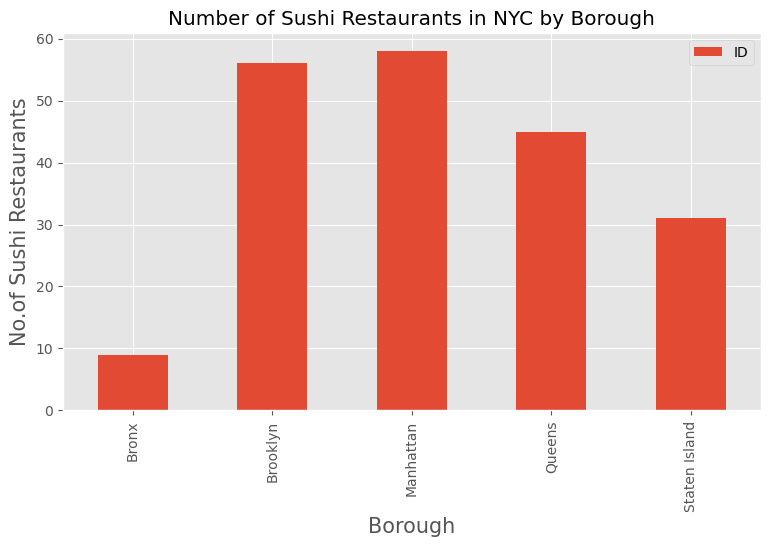

In [15]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Number of Sushi Restaurants in NYC by Borough')

#On x-axis
plt.xlabel('Borough', fontsize = 15)

#On y-axis
plt.ylabel('No.of Sushi Restaurants', fontsize=15)

#giving a bar plot
sushi_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')

#legend
plt.legend()

#displays the plot
plt.show()

In [20]:
# Display sushi restaurants in Sheepshead Bay, the neighborhood with the most sushi retautants
sushi_rest_ny[sushi_rest_ny['Neighborhood']=='Sheepshead Bay']

,Borough,Neighborhood,ID,Name
15,Brooklyn,Sheepshead Bay,4b9fc706f964a520cc3d37e3,Mitoushi Sushi
16,Brooklyn,Sheepshead Bay,4ba3ed56f964a520556e38e3,Hayashi
17,Brooklyn,Sheepshead Bay,4ada2ec4f964a520a61f21e3,Masakari
18,Brooklyn,Sheepshead Bay,4b6625e5f964a52052162be3,Ginza Sushi Inc
19,Brooklyn,Sheepshead Bay,4fd2bdbce4b0191b9b9e9c2a,Chikurin Sushi


# Graph Number of Sushi Restaurants in New York City by Neighborhood

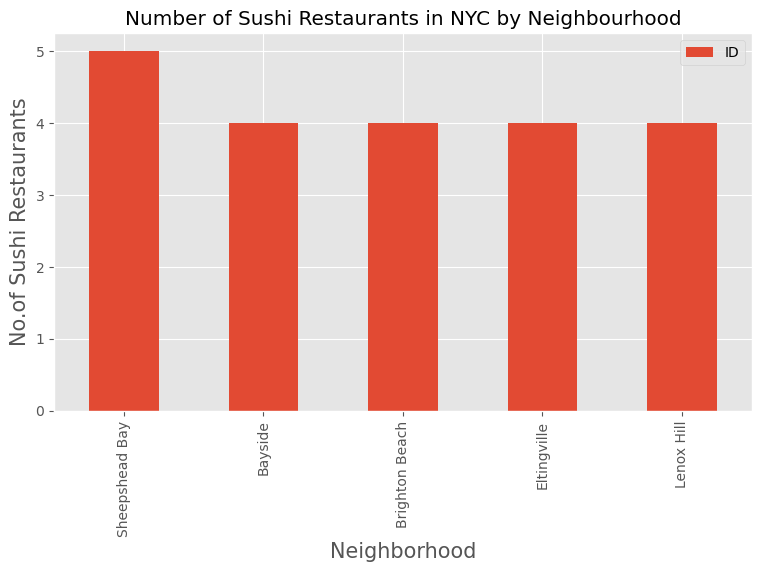

In [19]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Number of Sushi Restaurants in NYC by Neighborhood')

#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)

#On y-axis
plt.ylabel('No.of Sushi Restaurants', fontsize=15)

#giving a bar plot
sushi_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')

#legend
plt.legend()

#displays the plot
plt.show()

# Prepare List of Restaurants with Ratings

In [21]:
# Prepare neighborhood list that contains sushi resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
sushi_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in sushi_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains sushi resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
sushi_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in sushi_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(sushi_rest_ny),')','processed')
    sushi_rest_stats_ny = sushi_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                    Name  Likes  Rating  Tips
0  4c45c922f97fbe9a9e02bd30  Kiraku Hibachi & Sushi     12     8.0    10
( 1 / 199 ) processed
                         ID     Name  Likes  Rating  Tips
0  4bbfc5a974a9a5935519cff6  Sushi Q     12     7.9     9
( 2 / 199 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4c45c922f97fbe9a9e02bd30  Kiraku Hibachi & Sushi     12     8.0    10
( 3 / 199 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e25c5e0483bbcc48dc8531d
( 4 / 199 ) processed
                         ID         Name  Likes  Rating  Tips
0  4baa9c97f964a52088793ae3  Tokyo House     15     7.5     7
( 5 / 199 ) processed
                         ID     Name  Likes  Rating  Tips
0  4bbfc5a974a9a5935519cff6  Sushi Q     12     7.9     9
( 6 / 199 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4c8528aad34ca1434ea644

No data available for id= 55d4d1a8498ef1cf96fed351
( 61 / 199 ) processed
No data available for id= 55403115498e3227deb424b9
( 62 / 199 ) processed
No data available for id= 51573e61e4b06ee00f00307b
( 63 / 199 ) processed
No data available for id= 5a8c6e6fb6b04b2d4e648ccb
( 64 / 199 ) processed
No data available for id= 4a9b12eef964a5204e3420e3
( 65 / 199 ) processed
No data available for id= 414e1d80f964a520f11c1fe3
( 66 / 199 ) processed
No data available for id= 593747b672475054e94bd3d4
( 67 / 199 ) processed
No data available for id= 501adf11e4b0d225f8788a03
( 68 / 199 ) processed
No data available for id= 59a0a55725fb7b0552213ca6
( 69 / 199 ) processed
No data available for id= 414e1d80f964a520f11c1fe3
( 70 / 199 ) processed
No data available for id= 501adf11e4b0d225f8788a03
( 71 / 199 ) processed
No data available for id= 59a0a55725fb7b0552213ca6
( 72 / 199 ) processed
No data available for id= 593747b672475054e94bd3d4
( 73 / 199 ) processed
No data available for id= 4ac28e92f964

No data available for id= 558dfc74498e549b0fe95e73
( 172 / 199 ) processed
No data available for id= 577445a4cd100bd4db96ed96
( 173 / 199 ) processed
No data available for id= 450972f5f964a5203d391fe3
( 174 / 199 ) processed
No data available for id= 5b88b22f16ef67002ce49afe
( 175 / 199 ) processed
No data available for id= 450972f5f964a5203d391fe3
( 176 / 199 ) processed
No data available for id= 4bba3cf87421a593728fc340
( 177 / 199 ) processed
No data available for id= 577445a4cd100bd4db96ed96
( 178 / 199 ) processed
No data available for id= 49ecf7f1f964a520ba671fe3
( 179 / 199 ) processed
No data available for id= 5a0e475b018cbb6a2196479e
( 180 / 199 ) processed
No data available for id= 49d991d9f964a5204a5e1fe3
( 181 / 199 ) processed
No data available for id= 4a6f1c00f964a52054d51fe3
( 182 / 199 ) processed
No data available for id= 5004a603e4b03a9a7558faa1
( 183 / 199 ) processed
No data available for id= 4b6b6ad0f964a52066072ce3
( 184 / 199 ) processed
No data available for id=

In [22]:
# Display head
sushi_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Pelham Parkway,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi,12,8.0,10
1,Bronx,Country Club,4bbfc5a974a9a5935519cff6,Sushi Q,12,7.9,9
2,Bronx,Morris Park,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi,12,8.0,10
3,Bronx,Morris Park,0,0,0,0.0,0
4,Bronx,North Riverdale,4baa9c97f964a52088793ae3,Tokyo House,15,7.5,7


In [23]:
# Display shape
sushi_rest_stats_ny.shape

(199, 7)

In [24]:
# Display shape
sushi_rest_ny.shape

(199, 4)

In [25]:
# Create .csv file
sushi_rest_stats_ny.to_csv('sushi_rest_stats_ny.csv', index=False)

In [26]:
# Read .csv file
sushi_rest_stats_ny_csv=pd.read_csv('sushi_rest_stats_ny.csv')

In [27]:
# Display shape of .csv file
sushi_rest_stats_ny_csv.shape

(199, 7)

In [28]:
# Display head of .csv file
sushi_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Pelham Parkway,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi,12,8.0,10
1,Bronx,Country Club,4bbfc5a974a9a5935519cff6,Sushi Q,12,7.9,9
2,Bronx,Morris Park,4c45c922f97fbe9a9e02bd30,Kiraku Hibachi & Sushi,12,8.0,10
3,Bronx,Morris Park,0,0,0,0.0,0
4,Bronx,North Riverdale,4baa9c97f964a52088793ae3,Tokyo House,15,7.5,7


In [29]:
# Display info
sushi_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       199 non-null    object 
 1   Neighborhood  199 non-null    object 
 2   ID            199 non-null    object 
 3   Name          199 non-null    object 
 4   Likes         199 non-null    object 
 5   Rating        199 non-null    float64
 6   Tips          199 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.0+ KB


In [30]:
# Convert 'Likes' to float64
sushi_rest_stats_ny['Likes']=sushi_rest_stats_ny['Likes'].astype('float64')

In [31]:
# Convert 'tips' to float64
sushi_rest_stats_ny['Tips']=sushi_rest_stats_ny['Tips'].astype('float64')

In [32]:
# Display info
sushi_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       199 non-null    object 
 1   Neighborhood  199 non-null    object 
 2   ID            199 non-null    object 
 3   Name          199 non-null    object 
 4   Likes         199 non-null    float64
 5   Rating        199 non-null    float64
 6   Tips          199 non-null    float64
dtypes: float64(3), object(4)
memory usage: 11.0+ KB


In [34]:
# Show restaurants with maximum Likes
sushi_rest_stats_ny.iloc[sushi_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              423e0e80f964a52048201fe3
Name                                Bozu
Likes                                503
Rating                               8.9
Tips                                 165
Name: 31, dtype: object

In [35]:
# Show restaurants with maximum Rating
sushi_rest_stats_ny.iloc[sushi_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood            Prospect Heights
ID              532f5fd3498e2f7f41aab662
Name                         Silver Rice
Likes                                283
Rating                               9.2
Tips                                  81
Name: 29, dtype: object

In [36]:
# Show restaurants with maximum Tips
sushi_rest_stats_ny.iloc[sushi_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              423e0e80f964a52048201fe3
Name                                Bozu
Likes                                503
Rating                               8.9
Tips                                 165
Name: 31, dtype: object

In [37]:
ny_neighborhood_stats=sushi_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [38]:
# Display neighborhoods with highest 'Average Rating' for sushi restaurants
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
76,North Side,8.9
109,Williamsburg,8.9
95,South Side,8.9
84,Prospect Heights,8.9
26,Downtown,8.6
79,Park Slope,8.6
11,Boerum Hill,8.6
15,Brooklyn Heights,8.6
85,Prospect Lefferts Gardens,8.5
81,Pelham Parkway,8.0


In [39]:
ny_borough_stats=sushi_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [40]:
# Display neighborhoods with lowest 'Average Rating' for sushi restaurants
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,5.877778
1,Brooklyn,5.450000
2,Manhattan,0.000000
3,Queens,0.000000
4,Staten Island,0.000000


# Graph Average Rating of Sushi Restaurant by Borough

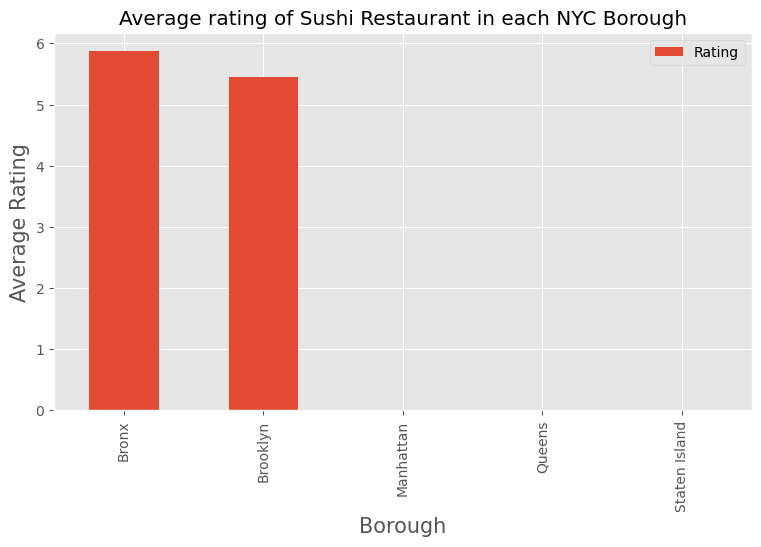

In [41]:
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Average rating of Sushi Restaurant in each NYC Borough')

#On x-axis
plt.xlabel('Borough', fontsize = 15)

#On y-axis
plt.ylabel('Average Rating', fontsize=15)

#giving a bar plot
sushi_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')

#legend
plt.legend()

#displays the plot
plt.show()

In [42]:
# Show neighborhood with 'Average Rating' >=8.0
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

In [43]:
ny_neighborhood_stats

,Neighborhood,Average Rating
11,Boerum Hill,8.6
15,Brooklyn Heights,8.6
26,Downtown,8.6
76,North Side,8.9
79,Park Slope,8.6
81,Pelham Parkway,8.0
84,Prospect Heights,8.9
85,Prospect Lefferts Gardens,8.5
95,South Side,8.9
109,Williamsburg,8.9


In [44]:
# Merge ny_neighborhood_stats and new_york_data
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [45]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [46]:
# Display 'Average Rating' in descending order with merged 'Latitude' and 'Longitude'
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
3,Brooklyn,North Side,40.714823,-73.958809,8.9
6,Brooklyn,Prospect Heights,40.676822,-73.964859,8.9
8,Brooklyn,South Side,40.710861,-73.958001,8.9
9,Brooklyn,Williamsburg,40.707144,-73.958115,8.9
0,Brooklyn,Boerum Hill,40.685683,-73.983748,8.6
1,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.6
2,Brooklyn,Downtown,40.690844,-73.983463,8.6
4,Brooklyn,Park Slope,40.672321,-73.977050,8.6
7,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,8.5
5,Bronx,Pelham Parkway,40.857413,-73.854756,8.0


In [47]:
# Create and display map
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [48]:
# Instantiate a feature group for  incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [49]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [50]:
# Add pop-up text for each marker
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        

# Add incidents to map
ny_map.add_child(incidents)